In [ ]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
import math 
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp2d
#-----------Loding File-------------------
f1=open("xc.dat",'r')
f2=open("yc.dat")
f3=open("u.dat")
f4=open("v.dat")
#--------Read File X and Y............................
xc=f1.readlines()
xc = list(map(float, xc))
xc=np.array(xc)
nim1=len(xc)                      #26
ni=nim1+1                         #27                                           

yc=f2.readlines()
yc = list(map(float, yc))
yc=np.array(yc)
njm1=len(yc)                      #26
nj=njm1+1                         #27
#-----------Read File U and V in cell center----------------
u1=f3.readlines()
u1 = list(map(float, u1))
u2d=np.reshape(u1,(ni,nj)) #27*27
u2d=np.array(u2d)
u2d=u2d.transpose()

v1=f4.readlines()
v1 = list(map(float, v1))
v2d=np.reshape(v1,(ni,nj)) #27*27
v2d=np.array(v2d)
v2d=v2d.transpose()
#-------Calculate Xp and Yp node Value--------------------------
xp= np.ones(ni)
for i in range(1,nim1):
    xp[i]=0.5*(xc[i]+xc[i-1])
xp[0]=xc[0]
xp[-1]=xc[-1]

yp= np.ones(nj)
for i in range(1,njm1):
    yp[i]=0.5*(yc[i]+yc[i-1])
yp[0]=yc[0]
yp[-1]=yc[-1]
#................Plot velocity at the cell center(node).....................
# plt.quiver(xp,yp,u2d,v2d,9)
# plt.savefig("output1.png",dpi=600)
# plt.show()
#----------------------velocity at the faces-------------------
Nx=ni-2    #number of cell
Ny=nj-2
u=np.zeros((nim1,njm1),dtype=np.float32)
v=np.zeros((nim1,njm1),dtype=np.float32)
for i in range(1,ni-1):
    for j in range(1,nj-1):
        u[i][j]=0.5*(u2d[i][j-1]+u2d[i][j])
        #u[i][j]=u2d[i][j-1]+(u2d[i,j]-u2d[i,j-1])*(xc[i]-xp[i])/(xp[i]-xp[i-1]);
for i in range(0,nim1):
    u[i][0]=u2d[i+1][0]
    u[i][-1]=u2d[i+1][-1]
for i in range(1,ni-1):
    for j in range(1,nj-1):
        v[i][j]=0.5*(v2d[i-1][j]+v2d[i][j])
        #v[i][j]=v2d[i-1][j]+(v2d[i][j]-v2d[i-1][j])*(yc[j]-yp[j])/(yp[j+1]-yp[j]);
for i in range(0,nim1):
    v[i][0]=v2d[i+1][0]
    v[i][-1]=v2d[i+1][-1]
#................Plot velocity at the face center(node).....................    
plt.quiver(xc,yc,u,v,9)
plt.savefig("output2.png",dpi=600)  
plt.show()
#----------------parameter define------------------------------------ 
gamma=1/500 #k_by_cp
rho=1
Key=0
epc=10**(-5)
residu=[]
itaration=[]
count=0
T_0=np.ones((ni,nj),dtype=np.float32)
T=np.ones((ni,nj),dtype=np.float32)
#..................defineboundary condition----------

for i in range(0,ni):
        if(yc[i-1]>=1.8):#1.864
            T[i][0]=20
        if(yc[i-1]>=0.136):
            T[i][-1]=10
#------------------equation loop-----------------------------------                
while(Key==0):    
    for i in range(1,ni-1):
        for j in range(1,nj-1):
            
            #Boundaries Update for Newmann
    for i in range(0,ni):
        if(yc[i-1]<=0.136):
            T[i,-1]=T[i,-2]
        if(yc[i-1]<=1.864):
            T[i,0]=T[i,1]
    for j in range(0,ni):
        T[0,j] = T[1,j]
        T[-1,j] = T[-2,j]
    count=count+1
    #print(count)
    itaration.append(count)            #itaration[j]=count
    #R[j]=(norm(T-T_0))/len(T)
    R=(norm(T-T_0))/len(T)
    residu.append(R)
    if(R<epc):
        Key=1
    T_0=copy.copy(T)
[X,Y]=np.meshgrid(xp,yp) #to view temp plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Temp Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.savefig("output2.png",dpi=600)
plt.show()


 The solution vector using numpy is: 
[165.40166205 285.12465374 393.76731302 491.32963989 577.81163435
 653.2132964  717.53462604 770.77562327 812.93628809 844.0166205
 864.0166205  872.93628809 870.77562327 857.53462604 833.2132964
 797.81163435 751.32963989 693.76731302 625.12465374 545.40166205]

 The solution vector using TDMA is: 
[ 70.3601108  194.9570282  308.47361318 410.90986576 502.26578592
 582.54137368 651.73662902 709.85155196 756.88614248 792.8404006
 817.7143263  831.5079196  834.22118048 825.85410896 806.40670502
 775.87896868 734.27089992 681.58249876 617.81376518 542.9646992 ]

 Guess temperature for iteration is : 	[71.14060684]


 The solution vector using Gauss Siedel is: 
[158.64675696 265.35490022 361.78356016 448.21167721 524.88508831
 592.01131796 649.7554227  698.23696769 737.52818476 767.65333152
 788.58924097 800.26702184 802.57484199 795.36170156 778.44207991
 751.60132073 714.60160475 667.18834773 609.09685519 540.05906253]


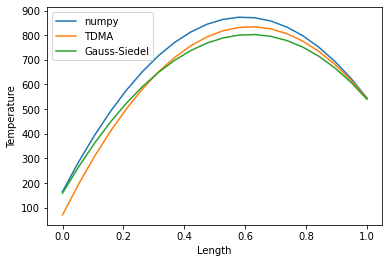

In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Define the domain
x_len = 1.0
x_points = 20
del_x = x_len/float(x_points-1)

x_gr = np.linspace(0, x_len, x_points, dtype=float)

# Define the parameters
k = 5.0
g = 20.0 * 1000
A = 0.01
T_0 = 100
T_L = 500

# Generate the equations
coeff_mat = np.zeros((x_points,x_points))
sol_mat = np.zeros(x_points)

for i in range(1, x_points-1):
    aW = k * A / float(del_x)
    aE = k * A / float(del_x)
    Sp = 0
    Su = g*A*del_x
    aP = aW + aE - Sp

    coeff_mat[i,i] = aP
    coeff_mat[i, i+1] = -1.0*aE
    coeff_mat[i,i-1] = -1.0*aW
    sol_mat[i] = Su

## Boundary 0
aW = 0
aE = k * A / float(del_x)
Sp = -1.0*k*A/float(del_x/float(2))
Su = g*A*del_x + T_0*k*A/float(del_x/float(2))
aP = aW + aE - Sp

coeff_mat[0,0] = aP
coeff_mat[0,1] = -1.0*aE
sol_mat[0] = Su

## Boundary -1
aE = 0
aW = k * A / float(del_x)
Sp = -1.0*k*A/float(del_x/float(2))
Su = g*A*del_x + T_L*k*A/float(del_x/float(2))
aP = aW + aE - Sp

coeff_mat[-1,-1] = aP
coeff_mat[-1,-2] = -1.0*aW
sol_mat[-1] = Su

# Solution using numpy (built-in function)
T_np = np.linalg.solve(coeff_mat,sol_mat)
print ("\n The solution vector using numpy is: \n" + str(T_np))


# Solution using TDMA (Tri diagonal matrix algorithm)
T_tdma = np.ones(x_points)
A = np.zeros(x_points)
C_dash = np.zeros(x_points)
A[0] = coeff_mat[0,1]/float(coeff_mat[0,0])
C_dash[0] = sol_mat[0]/float(coeff_mat[0,0])
for i in range(1, x_points-1):
    A[i] = -1.0 * coeff_mat[i, i + 1] / float(coeff_mat[i, i] - -1.0 * coeff_mat[i, i-1] * A[i - 1])
    C_dash[i] = (sol_mat[i] + -1.0 * coeff_mat[i, i-1] * C_dash[i - 1]) / float(coeff_mat[i, i] - -1.0 * coeff_mat[i, i-1] * A[i - 1])

C_dash[-1] = (sol_mat[-1] + -1.0 * coeff_mat[-1, -2] * C_dash[-2]) / float(coeff_mat[-1,-1] - -1.0 * coeff_mat[-1,-2] * A[-2])
A[-1] = 0
T_tdma[-1] = C_dash[-1]

for i in range(x_points-2, -1, -1):
    T_tdma[i] = A[i]*T_tdma[i+1] + C_dash[i]

print ("\n The solution vector using TDMA is: \n" + str(T_tdma))


# Solution using Gauss-Siedel iteration
T_guess = 100*np.random.rand(1)           # Starting guess temperature value - chosen random
print ("\n Guess temperature for iteration is : \t" + str(T_guess) + "\n")
T_gs = np.ones(x_points)*T_guess
num_itrs = 100                            # Number of iterations in Gauss-Siedel method
for it in range(num_itrs):
    for i in range(0, x_points):
        sum = 0
        for j in range(0, x_points):
            if i != j:
                sum = sum + (coeff_mat[i, j] * T_gs[j])
        T_gs[i] = (sol_mat[i] - sum) / coeff_mat[i, i]

print ("\n The solution vector using Gauss Siedel is: \n" + str(T_gs))


# Plotting the solution vectors
plt.plot(x_gr, T_np, label = "numpy")
plt.plot(x_gr, T_tdma, label = "TDMA")
plt.plot(x_gr, T_gs, label = "Gauss-Siedel")
plt.xlabel("Length")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [3]:
coeff_mat.shape

(20, 20)